In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance_df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
insurance_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
insurance_df.duplicated().sum()

1

In [7]:
insurance_df.drop_duplicates(inplace=True)

In [8]:
insurance_df.duplicated().sum()

0

In [9]:
# Convert the sex smoker and region into the numerical format
insurance_df['sex'] = insurance_df['sex'].astype('category')
insurance_df['sex'] = insurance_df['sex'].cat.codes

insurance_df['smoker'] = insurance_df['smoker'].astype('category')
insurance_df['smoker'] = insurance_df['smoker'].cat.codes

insurance_df['region'] = insurance_df['region'].astype('category')
insurance_df['region'] = insurance_df['region'].cat.codes

In [10]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [11]:
X = insurance_df.drop(columns=['expenses'])
X

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


In [12]:
y = insurance_df['expenses']
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1337, dtype: float64

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [15]:
c = linear_model.intercept_
print('Intercept =',c)

Intercept = -11969.261302366527


In [16]:
m = linear_model.coef_
print("Coeficient=",m)

Coeficient= [  259.00714383  -111.85576086   320.25154929   664.22115296
 23976.670534    -177.81007968]


In [17]:
y_pred = linear_model.predict(X_test)
y_pred

array([ 1.49803412e+03,  1.18196278e+04,  1.03403789e+04,  2.30500807e+03,
        8.32136965e+03,  1.11629119e+04,  3.20420698e+03,  7.31181174e+02,
        1.29659040e+04,  2.89391388e+04,  1.15861851e+04,  4.94685107e+03,
        3.04501015e+04,  6.43489213e+03,  2.71589102e+04,  1.36845976e+04,
        3.85551176e+03,  5.63435336e+03,  2.97769827e+04,  2.33243892e+03,
        1.23840081e+04,  2.05532053e+03,  7.67423766e+03,  3.20309847e+04,
        3.65435099e+04,  6.41582640e+03,  2.03182870e+03,  1.55292979e+04,
        6.29947641e+03,  1.82479937e+03,  9.59087341e+03,  7.60823032e+03,
        4.41290879e+03,  4.02748381e+03,  5.35317447e+02,  4.57085631e+03,
        2.98285330e+04,  3.43712575e+04,  2.72388941e+04,  1.43738507e+04,
        3.24904448e+04,  9.90219520e+03,  7.70388385e+03,  1.19894845e+03,
        5.09274661e+03,  7.90926248e+03,  1.31647362e+03,  8.19647637e+03,
        1.08170379e+04,  1.35762284e+04,  6.05970321e+03,  5.94969428e+03,
        2.91824386e+04,  

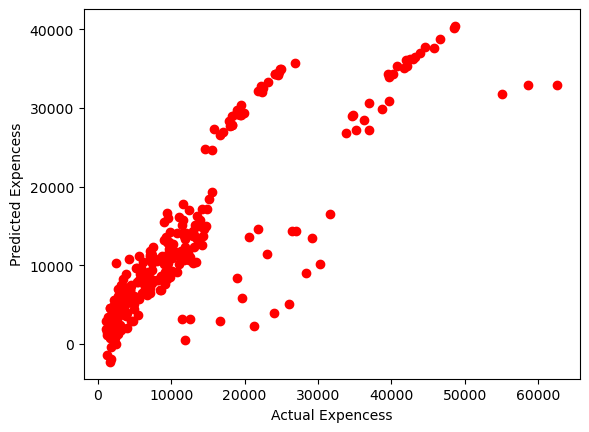

In [18]:
plt.scatter(y_test,y_pred,color='red')
plt.xlabel('Actual Expencess')
plt.ylabel("Predicted Expencess")
plt.show()

In [19]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [20]:
# Printing the calculated metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")

Mean Absolute Error (MAE): 4475.70
Mean Squared Error (MSE): 42831096.62
Root Mean Squared Error (RMSE): 6544.55
R-squared Score (R²): 0.72
